<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_1_3_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 1.3**
# **Elements of Linear Algebra**

Concepts covered:


*   1.3.1. QR decomposition
*   1.3.2. Least-squares problems
*   1.3.3. Linear regression







# 1.3.1 QR Decomposition

QR decomposition is a method of decomposing a matrix $ A $ into two components: $ Q $ and $ R $. The matrix $ Q $ is an orthonormal matrix, derived from applying the Gram-Schmidt process on matrix $A$. The matrix $ R $ is upper triangular, containing the coefficients used to express the original columns of $ A $ as linear combinations of the orthonormal vectors in $ Q $.

Mathematically, QR decomposition can be written as:

$
A = QR
$

where $ Q $ is a matrix with orthonormal columns and $ R $ is upper triangular. Given $ A = QR $, multiplying by $Q^T$ on LHS gives, $ Q^TA = Q^TQR $. Since Since $Q$ is an orthonormal matrix, multiplying $Q$ by its transpose $Q^T$ results in the identity matrix:

$
𝑄Q^T=𝐼
$

Thus resulting in $R = Q^TA$

In [5]:
#need these libraries to work with matrices and create figures
import numpy as np
import matplotlib.pyplot as plt

# Will define the 3x3 matrix A, as float values as well
A = np.array([[1, 2, 4],
              [3, 8, 14],
              [2, 6, 13]], dtype=float)

# Call on np.linalg method to perform QR decomposition of A
# Alternatively, I could have used my QR code from HW 1.2
Q, R = np.linalg.qr(A)

# Output the results
print("Matrix A:")
print(A)
print("\nMatrix Q (Orthonormal basis):")
print(Q)
print("\nMatrix R (Upper triangular matrix):")
print(R)

# Now want to reconstruct A from QR to show that A = QR
A_reconstructed = np.dot(Q, R)
print("\nReconstructed A from Q and R (A = QR):")
print(A_reconstructed)

# Check if the QR decomposition is correct (should be close to A)
print("\nCheck that A == QR (should be zero or really close to zero):")
print(A - A_reconstructed)

# Will also show Q * Q^T is idnetity and R = Q^T*A

Q_T = Q.T

identity = np.dot(Q_T,Q)
print("\nWill now multipy Q^TQ to get identity matrix (values will be really close to 0)")
print(identity)

# Finally show that R = Q^T*A

R_defined = np.dot(Q_T, A)

print("\nReconstructed R from Q^T and A (R = Q^TA):")
print(R_defined)

# Check that R matches R_defined
print("\nCheck that R == Q^TA (should be zero or really close to zero):")
print(R - R_defined)



Matrix A:
[[ 1.  2.  4.]
 [ 3.  8. 14.]
 [ 2.  6. 13.]]

Matrix Q (Orthonormal basis):
[[-0.26726124  0.77151675  0.57735027]
 [-0.80178373  0.15430335 -0.57735027]
 [-0.53452248 -0.6172134   0.57735027]]

Matrix R (Upper triangular matrix):
[[ -3.74165739 -10.15592719 -19.24280942]
 [  0.          -0.9258201   -2.7774603 ]
 [  0.           0.           1.73205081]]

Reconstructed A from Q and R (A = QR):
[[ 1.  2.  4.]
 [ 3.  8. 14.]
 [ 2.  6. 13.]]

Check that A == QR (should be zero or really close to zero):
[[ 3.33066907e-16  6.66133815e-16 -8.88178420e-16]
 [ 0.00000000e+00  8.88178420e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Will now multipy Q^TQ to get identity matrix (values will be really close to 0)
[[ 1.00000000e+00  4.17322119e-17 -8.71199496e-17]
 [ 4.17322119e-17  1.00000000e+00 -1.44527340e-16]
 [-8.71199496e-17 -1.44527340e-16  1.00000000e+00]]

Reconstructed R from Q^T and A (R = Q^TA):
[[-3.74165739e+00 -1.01559272e+01 -1.92428094e+01]

# 1.3.2 Least-squares problems

Given the system $Ax = b$, where $A \in \mathbb{R}^{n \times m}$ and $b \in \mathbb{R}^n$, if we wish to solve this, must account for the fact that the system is often inconsistent. To address this, we find the vector $x^*$ that minimizes the squared difference between $Ax$ and $b$,

$$ \min_{x \in \mathbb{R}^m} \|Ax - b\|. $$

By applying QR decomposition, where $A = QR$ with $Q$ orthogonal and $R$ upper triangular, the least squares solution is found by solving the equation:

$$ A x^* = QR x^* $$

$$ Q^T QR x^* = Q^Tb$$

Given $ Q^T Q = I$, can apply this property to the above $ Q^T QR x^* = Q^Tb$, which simplifies to:

$$ R x^* = Q^T b. $$

This method avoids directly computing the inverse of $A$ and can be used when $A$ has linearly independent columns. Can alternatively use the inverse of $A$ approach when if n = m and $A$ is a square matrix.




In [9]:
# Define matrix A as (3x2)
A = np.array([[2,1],
             [1,3],
             [4,1]])

# Define vector b as (3x1)
b = np.array([4,4,9])

# Will now use the steps outlined in textbook for least squares solution of above problem
# use QR decomposition of A

Q, R = np.linalg.qr(A)

# Form the orthogonal projection matrix: Pcol(A) = QQT. will not make a pcol(A) variable, will skip this step

# Apply the projection to b and observe that x∗ satisfies: Ax∗ = QQT b.

Q_T_b = np.dot(Q.T, b)

#Use the QR decomposition for A to get
# Ax* = QRx∗ = QQ^T b.
# Note QTQ = Im×m and multiply both sides by QT to get
# Rx* = Q^T b

# will finally solve Rx*=Q^T b by using back substituion
x_star = np.linalg.solve(R, Q_T_b)

print("Least-squares solution (x*):")
print(x_star)

# can now verify the solution that Ax ≈ b
Ax = np.dot(A, x_star)
print("\nAx:")
print(Ax)

print("\nb:")
print(b)

Least-squares solution (x*):
[2.02 0.62]

Ax:
[4.66 3.88 8.7 ]

b:
[4 4 9]


# 1.3.3: Linear Regression

Linear regression aims to find the best-fitting linear model for a given set of data points $(x_i, y_i)$. The goal is to determine the coefficients $\beta_0, \beta_1, \ldots, \beta_d$ that minimize the difference between the observed values $y_i$ and the predicted values $\hat{y}_i$ given by the model:

$$\hat{y}_i = \beta_0 + \sum_{j=1}^d \beta_j x_{ij}.$$

To find these coefficients, we approach this problem using a least-squares problem perspective. We want to minimize the sum of squared errors:

$$\min_{\beta} \sum_{i=1}^n (y_i - \hat{y}_i)^2,$$

where $\hat{y}_i$ is the predicted value from the linear model. This problem can be equivalently expressed as:

$$\min_{\beta} \| y - A\beta \|^2,$$

where $A$ is the matrix of data points with an added column of ones for the intercept, and $\beta$ is the vector of coefficients.

Solving this least-squares problem involves computing the coefficients $\beta$ using the equation:

$$\beta = (A^T A)^{-1} A^T y.$$

This equation provides the values for $\beta$ that minimize the distance between the given data $y$ and $\hat{y}$, thus giving the best-fit line for the data points.


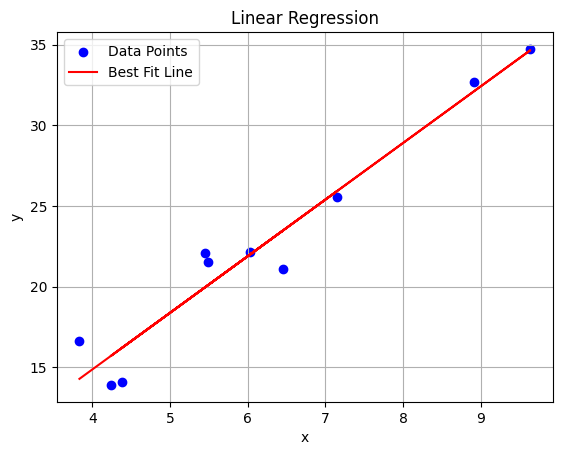

Beta coefficients: [0.83358051 3.50906796]
Simple linear regression model for sample data:
y = 0.83+3.51*x


In [37]:
#for consistency, generate a fixed seed value
np.random.seed(0)

#generates 10 random x values
x = np.random.rand(10,1)*10

# will generate y as being related to x by a coefficient of 3.2, but will add
# some random values to it so it will not be directly linear
y = 3.2 * x + np.random.rand(10,1)*5

# add a column of 1's to include beta_0 in the model
A = np.hstack([np.ones((x.shape[0], 1)), x])

A_T = A.T

# compute the matrix product A^T A, which will be used to find the inverse
A_T_A = A_T @ A

# compute the inverse of (A^T A) and multiply by A^T and y to get the coefficients beta
beta = np.linalg.inv(A_T_A) @ A_T @ y

#now that we have the coefficients, will create a y-pred variable
y_pred = A@ beta

# Flatten beta for plotting
beta_flat = beta.flatten()

# Plot the results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print("Beta coefficients:", beta_flat)

print("Simple linear regression model for sample data:")
print(f"y = {beta_flat[0]:.2f}+{beta_flat[1]:.2f}*x")